In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import math

Firstly, some notations made:

**$K(m,n,r,s)=w(r,s)w*(-r,-s)f(m+r,n+s)f*(m-r,n-s)$**

**$W=\exp(-j4\pi/N)$**

According to [1], the 2D discrete windowed WVD is defined as:

### $W(m,n,u,v)=4 {\sum\limits_{r=-L}^{L} \sum\limits_{s=-L}^{L} K(m,n,r,s)W(rp+sq)}$   (2)

In [2]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

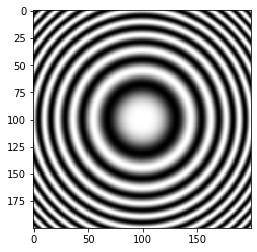

In [3]:
# Folder's path
# path = 'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'
path = 'C:\\Users\\ferna\\Desktop\\computerGeneratedHolography'

# Load and plot a specific example
file_path = path + '\\output\\main\\'
file_name = 'hol_center.mat'
key = 'hologram_out'
hol_center = loadMatFile(file_path, file_name, key)

plt.imshow(np.real(hol_center), cmap = 'gray')
plt.show()

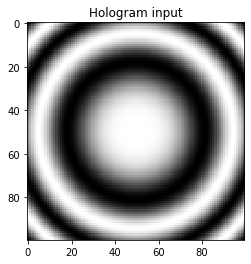

Input image: 100x100


In [4]:
# Reduce input image (too much computation)
new_x = 100
new_y = 100
hol_center_reduced = np.ones([new_x, new_y], dtype = complex)

# Center of the image
dif = int((hol_center.shape[0] - new_x)/2)
hol_center_reduced[:,:] = hol_center[dif:(hol_center.shape[0] - dif), dif:(hol_center.shape[1] - dif)] 

# Plot input image
plt.imshow(np.real(hol_center_reduced), cmap = 'gray')
plt.title('Hologram input')
plt.show()

# Samples of the input image
N = hol_center_reduced.shape[0]
print('Input image: %dx%d' % (N, N))

rows = hol_center_reduced.shape[0]
columns = hol_center_reduced.shape[1]

# Pixel position in the input image
x = int(hol_center_reduced.shape[0]/2)
y = int(hol_center_reduced.shape[0]/2)

# Positions in 2D wigner matrix
mu = np.arange(N)
mv = np.arange(N)

**Local caracter**

Size of kx and ky: 8. Range: -4 to 3
W: (100, 100)
f: (108, 108)


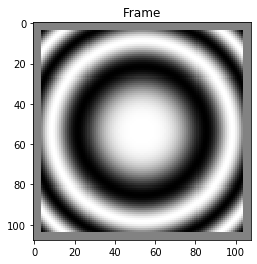

In [5]:
# Sum range values
L = 4 # local

kx = np.arange(-L, L) # -N/2, N/2 - 1
ky = np.arange(-L, L) # -N/2, N/2 - 1
print('Size of kx and ky: %d. Range: %d to %d' % (len(kx), kx[0], kx[-1]))

W = np.ones([N, N], dtype = complex)
print('W: ' + str(W.shape))

# Determine framing background image
h = 4

f = np.ones([rows + 2*h, columns + 2*h], dtype = complex)
print('f: ' + str(f.shape))

# Insert image into the frame
f[h:rows+h, h:columns+h] = hol_center_reduced

# Plot background image
plt.imshow(np.real(f), cmap = 'gray')
plt.title('Frame')
plt.show()

In [6]:
def wigner_distribution_one_point_not_optimal(N, mu, mv, kx, ky, x, y, h, f):

    # 2D matrix
    W = np.ones([N, N], dtype = complex)
    
    # Loop through the rows in the 2D wigner matrix
    for u in mu:
        
        # Loop through the columns in the 2D wigner matrix
        for v in mv:
            
            # Reset auxiliary variable
            aux = 0
            
            for kx_i in kx:
                
                for ky_i in ky:
                    
                    # Kernel function
                    K = f[int(x + h + kx_i), int(y + h + ky_i)] * np.conj(f[int(x + h + kx_i), int(y + h + ky_i)])
                    
                    aux = K * np.exp(-2j * ((2 * np.pi * u / N) * kx_i + (2 * np.pi * v / N) * ky_i)) + aux
                    
            # Update
            W[u,v] = 4*aux

    return W

In [12]:
%%time

W = wigner_distribution_one_point_not_optimal(N, mu, mv, kx, ky, x, y, h, f)
print(W.shape)

(100, 100)
Wall time: 10.5 s


In [8]:
def plotImage(kx, path, x, y, W, L):
    # Scales according to spatial frequencies
    lim_inf = kx[0]
    lim_sup = kx[-1]

    # Save the figure
    file_path = path + '\\output\\wigner_distribution\\'
    file_name = '2D_WD_(' + str(x) + ',' + str(y) + ')_' + str(L) + '_.png'

    # Plot result
    plt.imshow(np.real(W), cmap = 'gray', extent = [lim_inf, lim_sup, lim_inf, lim_sup])
    plt.title('2D wigner distribution of point [%d, %d]\nWindow length: %d' %(x, y, len(kx)))
    plt.xlabel('fx')
    plt.ylabel('fy')
    plt.savefig(file_path + file_name)
    plt.show()

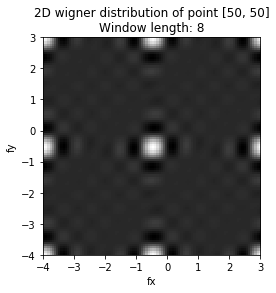

In [9]:
plotImage(kx, path, x, y, W, L)

**Compute all points in an image**

In [21]:
%%time

# 4D matrix
wigner = np.ones([N, N, N, N], dtype = complex)
print(wigner.shape)

# All the rows
# for i in range(N):
for i in range(1):
    
    # All the columns
    for j in range(N):
        
        wigner[i, j, :, :] = wigner_distribution_one_point_not_optimal(N, mu, mv, kx, ky, x, y, h, f)

(100, 100, 100, 100)
Wall time: 16min 58s


**Global caracter**

Size of kx and ky: 100. Range: -50 to 49
W: (100, 100)
f: (200, 200)


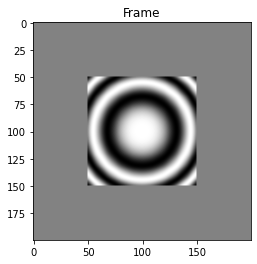

In [10]:
# Sum range values
L = N/2 # VERIFY, bigger the window, bigger the time computation

kx = np.arange(-L, L) # -N/2, N/2 - 1
ky = np.arange(-L, L) # -N/2, N/2 - 1
print('Size of kx and ky: %d. Range: %d to %d' % (len(kx), kx[0], kx[-1]))

W = np.ones([N, N], dtype = complex)
print('W: ' + str(W.shape))

# Determine framing background image
h = int(N/2) # VERIFY !!!!!!!

f = np.ones([rows + 2*h, columns + 2*h], dtype = complex)
print('f: ' + str(f.shape))

# Insert image into the frame
f[h:rows+h, h:columns+h] = hol_center_reduced

# Plot background image
plt.imshow(np.real(f), cmap = 'gray')
plt.title('Frame')
plt.show()

In [14]:
%%time

W = wigner_distribution_one_point_not_optimal(N, mu, mv, kx, ky, x, y, h, f)

Wall time: 0 ns


In [15]:
plotImage(kx, path, x, y, W)

**Overflow problem**

Avoid use np.sum function, with large arrays the result is not precise, overlflow can happen

In [11]:
# Problems with overflow, two ways of compute, differents results, which one is the correct ?
# Clue : problem in the sum function of the numpy library

# u, v positions in the 2D wigner matrix
u = 1
v = 1

# Number of samples of the image
N = 200 

# Sum range values
xx = np.arange(-100, 100) # some big number causes overflow, others dont, weird
print(xx.shape)

(200,)


In [12]:
# Try 1
aux1 = np.exp(-2j * ((2 * np.pi * u / N) * xx))
print(aux1.shape)
print(np.sum(aux1))

(200,)
(8.881784197001252e-15-3.552713678800501e-15j)


In [13]:
# Try 2
aux2 = 0
for i in xx:
    aux2 = np.exp(-2j * ((2 * np.pi * u / N) * i)) + aux2
print(aux2)

(6.328271240363392e-15+4.0245584642661925e-16j)


In [14]:
# Try 3
aux3 = 0
for i in aux1:
    aux3 = aux3 + i
print(aux3)

(6.328271240363392e-15+4.0245584642661925e-16j)


**Optmization test**

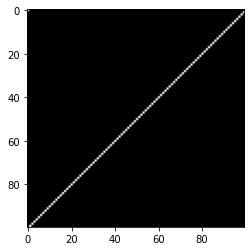

In [15]:
for u in mu:
    for v in mv:
        # Sums kx and ky
        array = np.exp(-2j * ((2 * np.pi * u / N) * kx + (2 * np.pi * v / N) * ky))
        # Sum array values
        accum = 0
        for i in array:
            accum = accum + i
        # Update wigner matrix
        W[u,v] = accum

plt.imshow(np.real(W), cmap = 'gray')
plt.show()

**Old**

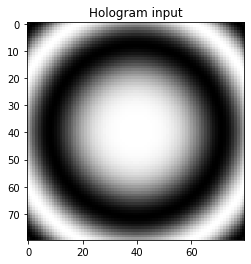

N: 80
Sum range values: 80
W: (80, 80)
f: (160, 160)


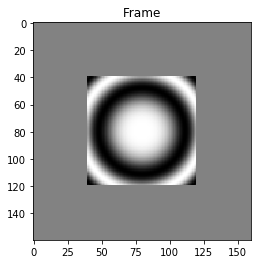

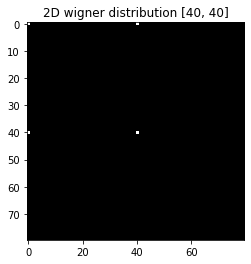

Wall time: 11min 11s


In [175]:
%%time
# Reduce input image (overflow problem in the sum)
hol_center_reduced = np.ones([80, 80], dtype = complex)

# Center of the image
hol_center_reduced[:,:] = hol_center[60:140, 60:140] 

# Plot input image
plt.imshow(np.real(hol_center_reduced), cmap = 'gray')
plt.title('Hologram input')
plt.show()

# Samples of the input image
N = hol_center_reduced.shape[0]
print('Input image %dx%d' % (N, N))

rows = hol_center_reduced.shape[0]
columns = hol_center_reduced.shape[1]

# Pixel position in the input image
x = 40
y = 40

# Positions in 2D wigner matrix
mu = np.arange(N)
mv = np.arange(N)

# Sum range values
L = N/2
kx = np.arange(-L, L) # -N/2, N/2 - 1
ky = np.arange(-L, L) # -N/2, N/2 - 1
print('Sum range values: %d' % (kx.shape))

W = np.ones([N, N], dtype = complex)
print('W: ' + str(W.shape))

# Determine framing background image
h = int(N/2)
f = np.ones([rows + 2*h, columns + 2*h], dtype = complex)
print('f: ' + str(f.shape))

# Insert image into the frame
f[h:rows+h, h:columns+h] = hol_center_reduced

# Plot background image
plt.imshow(np.real(f), cmap = 'gray')
plt.title('Frame')
plt.show()

#aux_x = f[x + h + kx, y + h + ky]
#print(aux_x.shape)

aux = 0
for u in mu:
    for v in mv:
        aux = 0
        for kx_i in kx:
            for ky_i in ky:
                # Kernel function
                K = f[int(x + h + kx_i), int(y + h + ky_i)] * np.conj(f[int(x + h + kx_i), int(y + h + ky_i)])
                aux = K * np.exp(-2j * ((2 * np.pi * u / N) * kx_i + (2 * np.pi * v / N) * ky_i)) + aux
        # Update
        W[u,v] = 4*aux

'''
for u in mu:
    for v in mv:
        # Sums
        aux = np.exp(-2j * ((2 * np.pi * u / N) * kx + (2 * np.pi * v / N) * ky))
        aux_sum = np.sum(aux)
        # Update
        W[u,v] = aux_sum        
'''

# Plot result
plt.imshow(np.real(W), cmap = 'gray')
plt.title('2D wigner distribution [%d, %d]' %(x, y))
plt.show()